In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import datetime
import math
from math import sqrt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation

<ipython-input-1-a0030765309d>:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
def get_stock_data(normalized=0):
    url = "BLK.csv"
    col_names = ['Date','Open','High','Low','Close','Volume','Adj Close']
    stocks = pd.read_csv('/content/BLK.csv', header=0, names=col_names) 
    df = pd.DataFrame(stocks)
    date_split = df['Date'].str.split('-').str
    df['Year'], df['Month'], df['Day'] = date_split
    df["Volume"] = df["Volume"] / 10000
    return df

In [6]:
df=get_stock_data(0)
df

<ipython-input-2-5fb116030cd4>:7: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df['Year'], df['Month'], df['Day'] = date_split


,Date,Open,High,Low,Close,Volume,Adj Close,Year,Month,Day
0,1999-10-01,14.000000,14.250000,14.000000,14.125000,0.000909,3162400,1999,10,01
1,1999-10-04,14.125000,14.125000,14.000000,14.000000,0.000901,533400,1999,10,04
2,1999-10-05,14.000000,14.125000,14.000000,14.125000,0.000909,270600,1999,10,05
3,1999-10-06,14.125000,14.875000,14.125000,14.875000,0.000957,205400,1999,10,06
4,1999-10-07,14.875000,14.875000,14.062500,14.125000,0.000909,214200,1999,10,07
...,...,...,...,...,...,...,...,...,...,...
5870,2023-01-31,750.000000,759.710022,746.090027,759.210022,0.075921,572000,2023,01,31
5871,2023-02-01,753.719971,768.299988,744.390015,762.630005,0.076263,702200,2023,02,01
5872,2023-02-02,763.900024,781.770020,763.140015,770.729980,0.077073,1101700,2023,02,02
5873,2023-02-03,750.000000,769.809998,747.989990,757.159973,0.075716,1201800,2023,02,03


In [7]:
df.drop(df.columns[[0,3,6, 7,8,9]], axis=1, inplace=True)
df.head()

,Open,High,Close,Volume
0,14.000,14.250,14.125,0.000909
1,14.125,14.125,14.000,0.000901
2,14.000,14.125,14.125,0.000909
3,14.125,14.875,14.875,0.000957
4,14.875,14.875,14.125,0.000909


In [8]:
df['Open'] = df['Open']/100
df['High'] = df['High']/100
df['Volume'] = df['Volume']*100
df['Close'] = df['Close']/100
print(df)
nan_value_index = []
High = df.High.isnull()
for i in range(0, len(High)):
    if High[i] == 1:
        nan_value_index.append(i)
        df['High'][i] = 0
Open = df.Open.isnull()
for i in range(0, len(Open)):
    if Open[i] == 1:
        nan_value_index.append(i)
        df['Open'][i] = 0
Volume = df.Volume.isnull()
for i in range(0, len(Volume)):
    if Volume[i] == 1:
        nan_value_index.append(i)
        df['Volume'][i] = 0
Close = df.Close.isnull()
for i in range(0, len(Close)):
    if Close[i] == 1:
        nan_value_index.append(i)
        df['Close'][i] = 0

         Open     High    Close    Volume
0     0.14000  0.14250  0.14125  0.090870
1     0.14125  0.14125  0.14000  0.090065
2     0.14000  0.14125  0.14125  0.090870
3     0.14125  0.14875  0.14875  0.095695
4     0.14875  0.14875  0.14125  0.090870
...       ...      ...      ...       ...
5870  7.50000  7.59710  7.59210  7.592100
5871  7.53720  7.68300  7.62630  7.626300
5872  7.63900  7.81770  7.70730  7.707300
5873  7.50000  7.69810  7.57160  7.571600
5874  7.46980  7.50120  7.42380  7.423800

[5875 rows x 4 columns]


In [9]:
X = df[['High','Open', 'Volume']]
Y = df[['Close']]
factor = 0.80
length = X.shape[0]
total_for_train = int(length*factor)
X_train = X[:total_for_train]
Y_train = Y[:total_for_train]
X_test = X[total_for_train:]
Y_test = Y[total_for_train:]

In [10]:
print("X_train", X_train.shape)
print("y_train", Y_train.shape)
print("X_test", X_test.shape)
print("y_test", Y_test.shape)

X_train (4700, 3)
y_train (4700, 1)
X_test (1175, 3)
y_test (1175, 1)


In [11]:
classifier = Sequential()
classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 3))
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'linear'))
classifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = [])
classifier.fit(X_train, Y_train, batch_size = 128, epochs = 10, validation_split=0.05)

Epoch 1/10
35/35 [==============================] - 1s 8ms/step - loss: 3.9624 - val_loss: 22.6653
Epoch 2/10
35/35 [==============================] - 0s 4ms/step - loss: 3.0018 - val_loss: 12.8005
Epoch 3/10
35/35 [==============================] - 0s 3ms/step - loss: 0.8481 - val_loss: 0.6130
Epoch 4/10
35/35 [==============================] - 0s 4ms/step - loss: 0.0548 - val_loss: 0.0912
Epoch 5/10
35/35 [==============================] - 0s 3ms/step - loss: 0.0405 - val_loss: 0.1098
Epoch 6/10
35/35 [==============================] - 0s 3ms/step - loss: 0.0335 - val_loss: 0.0798
Epoch 7/10
35/35 [==============================] - 0s 4ms/step - loss: 0.0272 - val_loss: 0.0552
Epoch 8/10
35/35 [==============================] - 0s 3ms/step - loss: 0.0216 - val_loss: 0.0382
Epoch 9/10
35/35 [==============================] - 0s 4ms/step - loss: 0.0169 - val_loss: 0.0257
Epoch 10/10
35/35 [==============================] - 0s 3ms/step - loss: 0.0130 - val_loss: 0.0164


In [12]:
predictions = classifier.predict(X_test)
print(predictions[:10])

37/37 [==============================] - 1s 11ms/step
[[5.3795214]
 [5.3321185]
 [5.3509216]
 [5.3485894]
 [5.273204 ]
 [5.152718 ]
 [5.0981045]
 [5.125152 ]
 [5.1170073]
 [5.1432853]]


In [13]:
trainScore = classifier.evaluate(X_train, Y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = classifier.evaluate(X_test, Y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.01 MSE (0.11 RMSE)
Test Score: 0.01 MSE (0.10 RMSE)


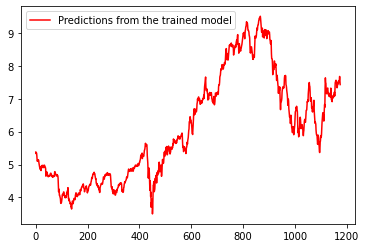

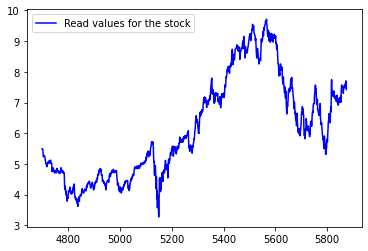

In [14]:
import matplotlib.pyplot as plt
plt.plot(predictions,color='red', label='Predictions from the trained model')
plt.legend(loc='upper left')
plt.show()
plt.plot(Y_test,color='blue', label='Read values for the stock')
plt.legend(loc='upper left')
plt.show()